# Analysis data Global Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Defining counting function
def cont(x,p):
    dat = []
    for j in range(p):
      s = 0
      for i in x:
        if j == i: 
          s += 1
      dat.append(s)
    return(dat)



#This Function give the Smax, the S of propaganda and sigma
def smax_sprop_sigma(mean_result_per_tolerance,propaganda):
    smax = np.max(mean_result_per_tolerance)
    sprop = mean_result_per_tolerance[propaganda]
    sigma = abs(smax - sprop)
    return smax, sprop, sigma

In [3]:
#Defining mean value of values between list
#This function is defined to obtain the mean value of numbers in the same position in diferent lists
def meansize(listadelistas):
    mean_final = []
    for columns in range(len(listadelistas[0][0])):
        mean_rows = []
        for rows in range(len(listadelistas[0])):
            suma_rep = 0
            for rep in range(len(listadelistas)):
                suma_rep += listadelistas[rep][rows][columns]
            meanv = suma_rep/len(listadelistas)
            mean_rows.append(meanv)
        mean_final.append(mean_rows)
    return mean_final

## Analisys stop condition t = 15000

In [4]:


options = 100
propaganda = 80
#intensity = np.linspace(1/options,1,options)
intensity = [0.2,0.5,0.8]
tolerance = np.linspace(1,options ,options )

total_smax = []
total_sprop =[]
total_sigma = []
for ident in range(50):
    smax_data = []
    sprop_data = []
    sigma_data = []
    for inten in intensity:
        smaxdata_per_tolerance = []
        spropdata_per_tolerance = []
        sigmadata_per_tolerance = []
        for tole in tolerance:
            df = pd.read_csv(f'Data_global_n/data_global_intensity_i{inten}_t{tole}_{ident}')
            df1 = df.to_numpy().tolist()
            count_nodes_option = cont(np.transpose(df1)[0],options)
            smax, sprop, sigma = smax_sprop_sigma(count_nodes_option,propaganda)
            smaxdata_per_tolerance.append(smax)
            spropdata_per_tolerance.append(sprop)
            sigmadata_per_tolerance.append(sigma)
        smax_data.append(smaxdata_per_tolerance)
        sprop_data.append(spropdata_per_tolerance)
        sigma_data.append(sigmadata_per_tolerance)
    total_smax.append(smax_data)
    total_sprop.append(sprop_data)
    total_sigma.append(sigma_data)

    
#smax_mean = meansize(total_smax)
#sprop_mean = meansize(total_sprop)
#sigma_mean = meansize(total_sigma)
        

In [5]:
np.array(total_sigma)

array([[[19, 64, 65, ...,  0,  0,  0],
        [26, 27,  2, ...,  0,  0,  0],
        [ 9, 25, 24, ...,  0,  0,  0]],

       [[12,  9, 91, ...,  0,  0,  0],
        [34,  4, 37, ...,  0,  0,  0],
        [20, 39, 70, ...,  0,  0,  0]],

       [[23, 23, 10, ...,  0,  0,  0],
        [41, 48, 32, ...,  0,  0,  0],
        [29, 53, 53, ...,  0,  0,  0]],

       ...,

       [[27, 25, 41, ...,  0,  0,  0],
        [22, 25, 50, ...,  0,  0,  0],
        [19, 18, 18, ...,  0,  0,  0]],

       [[ 8, 38, 21, ...,  0,  0,  0],
        [35, 17, 29, ...,  0,  0,  0],
        [15, 28, 16, ...,  0,  0,  0]],

       [[18, 24, 56, ...,  0,  0,  0],
        [16, 29, 25, ...,  0,  0,  0],
        [18, 59, 11, ...,  0,  0,  0]]])

In [6]:
smax_mean = meansize(total_smax)
sprop_mean = meansize(total_sprop)
sigma_mean = meansize(total_sigma)

In [9]:
    
df_smax = pd.DataFrame(np.array(smax_mean).T)
df_smax.to_csv("smax_data_n1000_p100_itruc.csv", index=False)

df_sprop = pd.DataFrame(np.array(sprop_mean).T)
df_sprop.to_csv("sprop_data_n100_p100_itruc.csv", index=False)

df_sigma = pd.DataFrame(np.array(sigma_mean).T)
df_sigma.to_csv("sigma_data_n100_p100_itruc.csv", index=False)



In [2]:
df0 = pd.read_csv('sigma_data_n100_p100_itruc.csv')
df1 = df0.to_numpy().tolist()

df2 = pd.read_csv('data_analyzed/sigma_data_n1000_p100_t8000.csv')
df3 = df2.to_numpy().tolist()

df4 = pd.read_csv('data_analyzed/sigma_data_n1000_p100_t5000.csv')
df5 = df4.to_numpy().tolist()

df6 = pd.read_csv('sigma_data_n1000_p100.csv')
df7 = df6.to_numpy().tolist()

In [20]:
print(len(np.array(df1).T[0]),len(df3[20]))

3 100


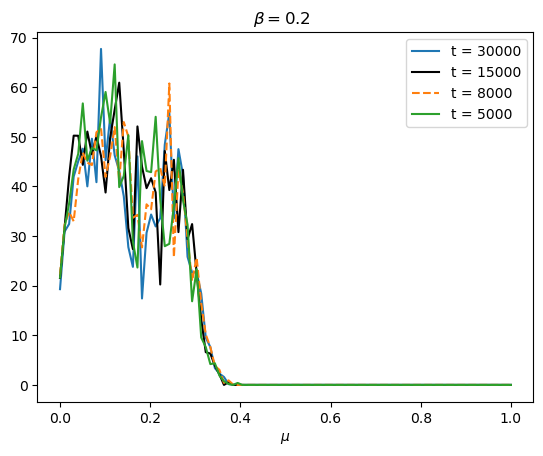

In [27]:
plt.plot(np.linspace(0,1,100),np.array(df7).T[0],label =  't = 30000')
plt.plot(np.linspace(0,1,100),np.array(df1)[0],'k',label =  't = 15000')
plt.plot(np.linspace(0,1,100),df3[20],'--',label =  't = 8000')
plt.plot(np.linspace(0,1,100),df5[20],label =  't = 5000')
plt.xlabel(r'$\mu$')
plt.title(r'$\beta = 0.2$  ')
plt.legend()
#plt.show()
plt.savefig("Images/global_sigma_dif_time_beta0.2_n1000_p100_4times.png")

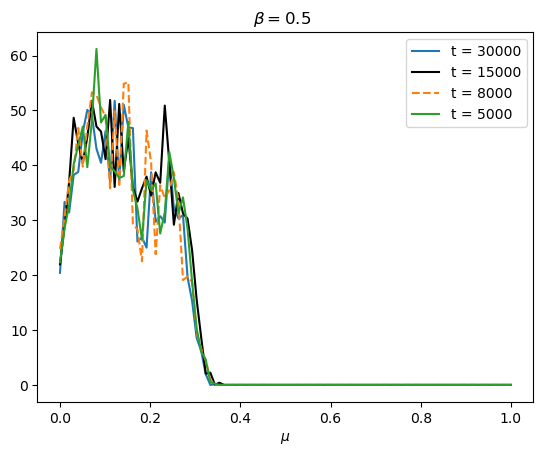

In [29]:
plt.plot(np.linspace(0,1,100),np.array(df7).T[1],label =  't = 30000')
plt.plot(np.linspace(0,1,100),np.array(df1)[1],'k',label =  't = 15000')
plt.plot(np.linspace(0,1,100),df3[50],'--',label =  't = 8000')
plt.plot(np.linspace(0,1,100),df5[50],label =  't = 5000')
plt.xlabel(r'$\mu$')
plt.title(r'$\beta = 0.5$  ')
plt.legend()
#plt.show()
plt.savefig("Images/global_sigma_dif_time_beta0.5_n1000_p100_4times.png")

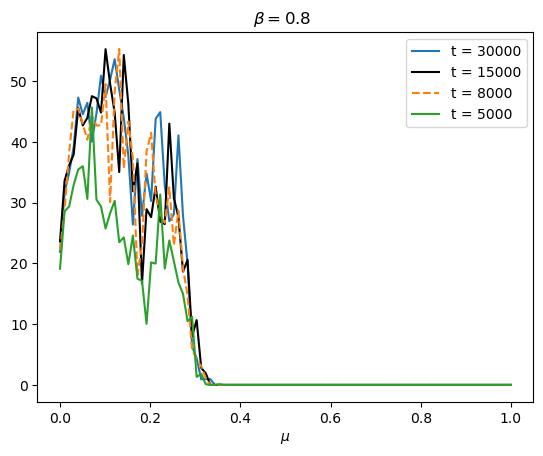

In [31]:
plt.plot(np.linspace(0,1,100),np.array(df7).T[2],label =  't = 30000')
plt.plot(np.linspace(0,1,100),np.array(df1)[2],'k',label =  't = 15000')
plt.plot(np.linspace(0,1,100),df3[80],'--',label =  't = 8000')
plt.plot(np.linspace(0,1,100),df5[80],label =  't = 5000')
plt.xlabel(r'$\mu$')
plt.title(r'$\beta = 0.8$  ')
plt.legend()
#plt.show()
plt.savefig("Images/global_sigma_dif_time_beta0.8_n1000_p100_4times.png")

# Graphs - Heat maps

## $\sigma$ vs. $\beta$ 

In [31]:
df = pd.read_csv('sigma_data_n1000_p100.csv')
df1 = df.to_numpy().tolist()

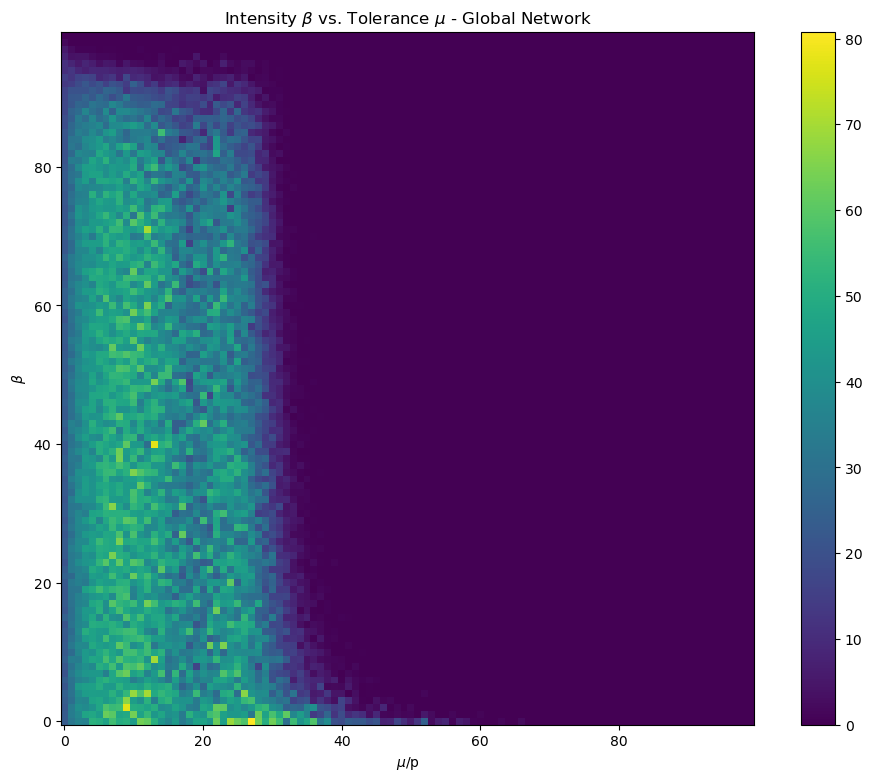

In [25]:
plt.figure(figsize =(12,9))
plt.imshow(np.array(df2) ,origin = 'lower')
plt.colorbar()
plt.xlabel(r"$\mu$/p")
plt.ylabel(r"$\beta$")
plt.title(r"Intensity $\beta$ vs. Tolerance $\mu$ - Global Network")
plt.show()
#plt.savefig("Images/global_beta_vs_mu_n1000_p100_t8000.png")

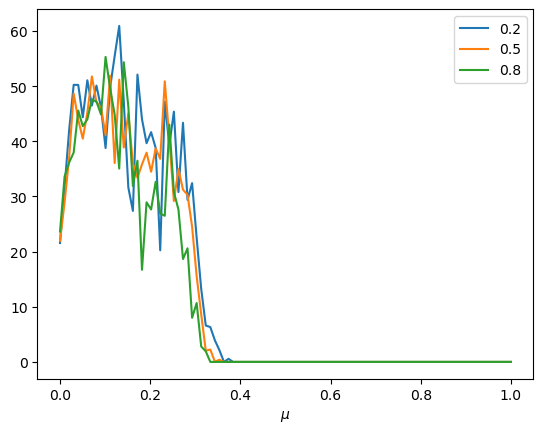

In [37]:
plt.plot(np.linspace(0,1,100),np.array(df1)[0],label = '0.2')
plt.plot(np.linspace(0,1,100),np.array(df1)[1],label = '0.5')
plt.plot(np.linspace(0,1,100),np.array(df1)[2],label = '0.8')
#plt.plot(np.linspace(0,1,100),np.array(df1).T[15],label = '15')
#plt.plot(np.linspace(0,1,100),np.array(df1).T[25],label = '25')
plt.xlabel(r'$\mu$')
plt.legend()
plt.show()